In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os,glob
import pandas as pd
path = '/Users/zoe/Desktop/training/*.psv'
header = 'HR|O2Sat|Temp|SBP|MAP|DBP|Resp|EtCO2|BaseExcess|HCO3|FiO2|pH|PaCO2|SaO2|AST|BUN|Alkalinephos|Calcium|Chloride|Creatinine|Bilirubin_direct|Glucose|Lactate|Magnesium|Phosphate|Potassium|Bilirubin_total|TroponinI|Hct|Hgb|PTT|WBC|Fibrinogen|Platelets|Age|Gender|Unit1|Unit2|HospAdmTime|ICULOS|SepsisLabel'
def readData(filename):
    datas = []
    with open(filename) as fr:
        fr.readline()
        for line in fr:
            datas.append(line.strip())
    return datas

In [3]:
import pandas as pd
df = pd.read_csv('undersampling.csv', sep='|')

In [4]:
df.shape

(1552210, 41)

In [5]:
find_small_HR_list = df['HR'].to_list()
count = 0
for i in find_small_HR_list:
    if(i<30):
        count+=1
print(count)
df.loc[df['HR']<30,'HR']=60

find_small_Temp_list = df['Temp'].to_list()
count = 0
for i in find_small_Temp_list:
    if(i>=43):
        count+=1
print(count)
df.loc[df['Temp']>43,'Temp']=42

find_small_Resp_list = df['Resp'].to_list()
count = 0
for i in find_small_Resp_list:
    if(i>=78):
        count+=1
print(count)
df.loc[df['Resp']>=78,'Resp']=78

find_large_Resp_list = df['Resp'].to_list()
count = 0
for i in find_large_Resp_list:
    if(i<=8):
        count+=1
print(count)
df.loc[df['Resp']<=8,'Resp']=8

131
2
53
9604


In [6]:
df = pd.concat([df[df['SepsisLabel']==0].sample(len(df[df['SepsisLabel']==1])* 9),df[df['SepsisLabel']==1]])
print(df.SepsisLabel.value_counts())

0    251244
1     27916
Name: SepsisLabel, dtype: int64


In [7]:
df.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
668005,103.0,100.0,NaN,115.0,82.00,55.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,53.00,0,0.0,1.0,-0.76,21,0
1059246,100.0,96.0,38.56,158.0,92.00,57.0,21.0,NaN,NaN,27.0,...,NaN,NaN,NaN,80.98,1,NaN,NaN,-0.03,137,0
236991,92.0,95.0,NaN,136.0,106.00,75.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,68.00,1,1.0,0.0,-2.59,12,0
487459,91.0,95.0,36.89,137.0,75.67,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.17,0,1.0,0.0,-0.02,190,0
1492056,80.0,97.0,37.65,93.0,69.00,57.0,NaN,30.0,NaN,NaN,...,9.2,NaN,135.0,61.00,1,0.0,1.0,-50.75,13,0


In [8]:
df.isnull().sum().sum()

7805718

In [9]:
df.interpolate(method = 'linear', axis = 0).head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
668005,103.0,100.0,NaN,115.0,82.00,55.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,53.00,0,0.0,1.0,-0.76,21,0
1059246,100.0,96.0,38.560,158.0,92.00,57.0,21.0,NaN,NaN,27.000000,...,NaN,NaN,NaN,80.98,1,0.5,0.5,-0.03,137,0
236991,92.0,95.0,37.725,136.0,106.00,75.0,16.0,NaN,NaN,26.974359,...,NaN,NaN,NaN,68.00,1,1.0,0.0,-2.59,12,0
487459,91.0,95.0,36.890,137.0,75.67,66.0,20.0,NaN,NaN,26.948718,...,NaN,NaN,NaN,83.17,0,1.0,0.0,-0.02,190,0
1492056,80.0,97.0,37.650,93.0,69.00,57.0,16.5,30.0,NaN,26.923077,...,9.2,NaN,135.0,61.00,1,0.0,1.0,-50.75,13,0


In [10]:
title = header.strip().split('|')[:-1]
title.remove('BaseExcess')
title.remove('HCO3')
#title.remove('EtCO2')
title.remove('FiO2')
title.remove('PaCO2')
title.remove('SaO2')
title.remove('AST')
title.remove('BUN')
title.remove('Alkalinephos')
title.remove('Calcium')
title.remove('Chloride')
title.remove('Creatinine')
title.remove('Bilirubin_direct')
title.remove('Glucose')
title.remove('Lactate')
title.remove('Magnesium')
title.remove('Phosphate')
title.remove('Potassium')
title.remove('Bilirubin_total')
title.remove('TroponinI')
title.remove('Hct')
title.remove('Hgb')
title.remove('PTT')
title.remove('WBC')
title.remove('Fibrinogen')
title.remove('Platelets')
title.remove('Unit1')
title.remove('Unit2')
title.remove('pH')
del df['BaseExcess']
del df['HCO3']
#del df['EtCO2']
del df['FiO2']
del df['PaCO2']
del df['SaO2']
del df['AST']
del df['BUN']
del df['Alkalinephos']
del df['Calcium']
del df['Chloride']
del df['Creatinine']
del df['Bilirubin_direct']
del df['Glucose']
del df['Lactate']
del df['Magnesium']
del df['Phosphate']
del df['Potassium']
del df['Bilirubin_total']
del df['TroponinI']
del df['Hct']
del df['Hgb']
del df['PTT']
del df['WBC']
del df['Fibrinogen']
del df['Platelets']
del df['Unit1']
del df['Unit2']
del df['pH']

In [11]:
from sklearn import ensemble
train_data = df.copy()
features = title

In [12]:
for new_label in title:
    print('process feather for {}'.format(new_label))
    new_features = []
    for f in title:
        if f != new_label:
            new_features.append(f)
    try:
        new_train_x = train_data[train_data[new_label].isnull()==False][new_features]
        new_train_x.fillna(new_train_x.mean(), inplace=True) 
        new_train_y = train_data[train_data[new_label].isnull()==False][new_label]

        new_predict_x = train_data[train_data[new_label].isnull()==True][new_features]
        new_predict_x.fillna(new_predict_x.mean(), inplace=True)
        new_predict_y = train_data[train_data[new_label].isnull()==True][new_label]

        rfr = ensemble.RandomForestRegressor(random_state=2021, n_estimators=10, n_jobs=-1)
        rfr.fit(new_train_x, new_train_y)
        new_predict_y = rfr.predict(new_predict_x)

        new_predict_y = pd.DataFrame(new_predict_y, columns=[new_label], index=new_predict_x.index)
        new_predict_y = pd.concat([new_predict_x, new_predict_y], axis=1)
        new_train_y = pd.concat([new_train_x, new_train_y], axis=1)
        new_train_data = pd.concat([new_predict_y,new_train_y]) 

        train_data_x = new_train_data[features]
        train_data_y = train_data[header.strip().split('|')[-1]]
        print('fill ok')
    except Exception as e:
        pass

process feather for HR
fill ok
process feather for O2Sat
fill ok
process feather for Temp
fill ok
process feather for SBP
fill ok
process feather for MAP
fill ok
process feather for DBP
fill ok
process feather for Resp
fill ok
process feather for EtCO2
fill ok
process feather for Age
process feather for Gender
process feather for HospAdmTime
process feather for ICULOS


In [13]:
new_train_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,EtCO2
668005,103.0,100.000000,36.995576,115.0,82.00,55.000000,21.0,53.00,0,-0.76,21,35.4
1059246,100.0,96.000000,38.560000,158.0,92.00,57.000000,21.0,80.98,1,-0.03,137,30.8
236991,92.0,95.000000,36.995576,136.0,106.00,75.000000,16.0,68.00,1,-2.59,12,34.0
487459,91.0,95.000000,36.890000,137.0,75.67,63.752627,20.0,83.17,0,-0.02,190,31.3
829832,100.0,97.126044,36.995576,95.5,66.00,59.000000,13.0,63.77,1,-4.80,6,37.5


In [14]:
new_train_data.isnull().sum().sort_values(ascending=False)

EtCO2          0
ICULOS         0
HospAdmTime    0
Gender         0
Age            0
Resp           0
DBP            0
MAP            0
SBP            0
Temp           0
O2Sat          0
HR             0
dtype: int64

In [15]:
set(train_data_y.tolist())

{0, 1}

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_x,train_data_y,test_size=0.3, random_state=2021)

In [17]:
len(X_train)

195412

In [18]:
import os
import numpy as np
import pandas as pd
import catboost as cat
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn import svm

from sklearn.metrics import classification_report, accuracy_score,auc,confusion_matrix,precision_score,recall_score,roc_auc_score,\
roc_curve,f1_score,plot_confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set()
print(os.listdir()) #chinese edition to save picture

['工作簿 1.twb', 'f1score.xlsx', 'undersampling-1比1.ipynb', '论文计划表.xlsx', '.DS_Store', 'undersampling.csv', 'Data_Processing.ipynb', 'Design.ipynb', 'xxx', 'Model_noundersampling.ipynb', 'demo.ipynb', 'noundersampling.ipynb', 'boost.ipynb', 'data.csv', 'xxx.zip', '1比1采样建模结果.csv', 'traindata.csv', 'undersampling.ipynb', 'undersampling-1-1 prc.ipynb', '.ipynb_checkpoints', 'sb.ipynb', 'train_data.csv', 'training_setA.csv', 'undersampling(1).ipynb', '处理data2.ipynb', '优化.ipynb']


In [19]:
gbdt = GradientBoostingClassifier(n_estimators=40)
rf = RandomForestClassifier(n_estimators=500,max_depth=10)
knn = KNeighborsClassifier(n_neighbors=3)
byes = MultinomialNB(alpha=0.001)
logr = LogisticRegression(penalty='l2')
dt = tree.DecisionTreeClassifier(max_depth=9)
lg = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',num_leaves=46,min_data_in_leaf=11,learning_rate=0.18,metric='auc',
                              feature_fraction=0.9)
ct = cat.CatBoostClassifier(iterations=30,depth=9,learning_rate=0.08,loss_function='Logloss', logging_level='Silent')
xg = xgb.XGBClassifier()
ada = AdaBoostClassifier()

****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        72927  2488
1         6053  2280


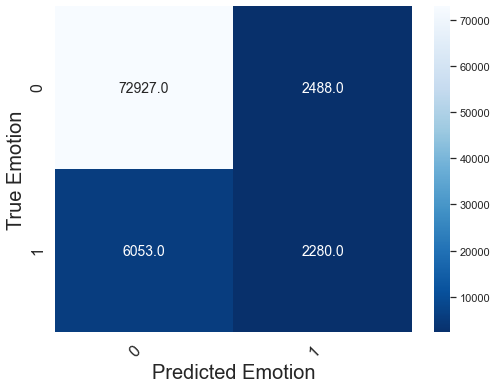

classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     78980
           1       0.27      0.48      0.35      4768

    accuracy                           0.90     83748
   macro avg       0.62      0.70      0.65     83748
weighted avg       0.93      0.90      0.91     83748

KNNresult:

Precision_score: 0.47818791946308725
Recall_score: 0.2736109444377775
f1_score: 0.34806503320357224
AUC: 0.7331430017792105


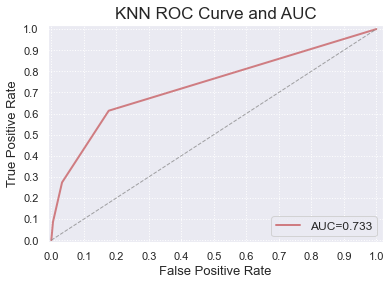

No handles with labels found to put in legend.


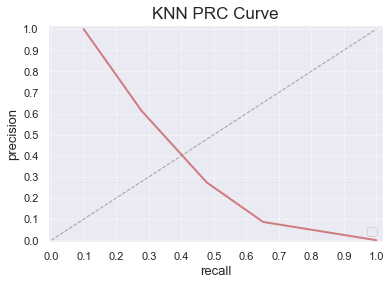

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0    1
true               
0        75062  353
1         8135  198


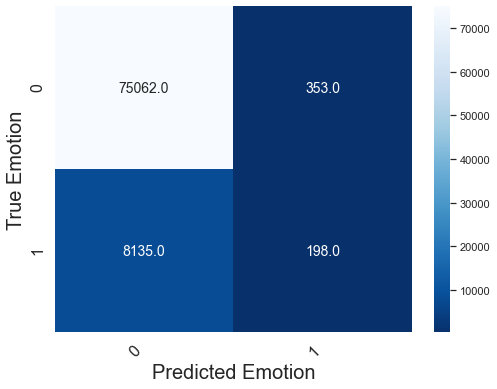

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     83197
           1       0.02      0.36      0.04       551

    accuracy                           0.90     83748
   macro avg       0.51      0.63      0.50     83748
weighted avg       0.99      0.90      0.94     83748

Logisticresult:

Precision_score: 0.35934664246823955
Recall_score: 0.02376095043801752
f1_score: 0.044574515983791085
AUC: 0.6377088570249698


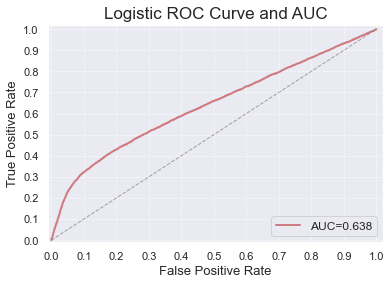

No handles with labels found to put in legend.


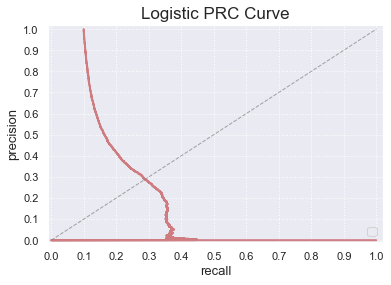

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        75107   308
1         6084  2249


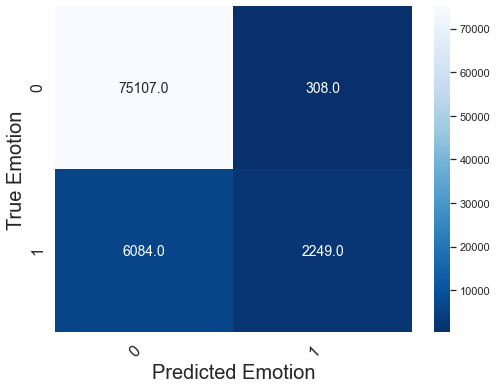

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     81191
           1       0.27      0.88      0.41      2557

    accuracy                           0.92     83748
   macro avg       0.63      0.90      0.69     83748
weighted avg       0.97      0.92      0.94     83748

Decision Treeresult:

Precision_score: 0.879546343371138
Recall_score: 0.2698907956318253
f1_score: 0.41303948576675853
AUC: 0.7950123290352287


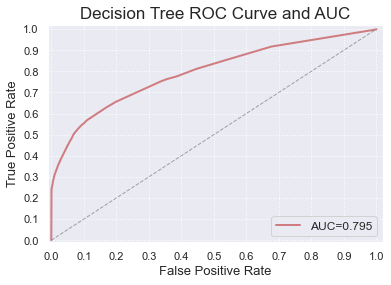

No handles with labels found to put in legend.


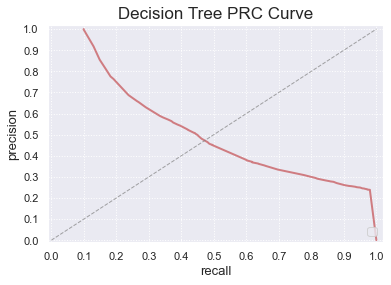

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        75245   170
1         6229  2104


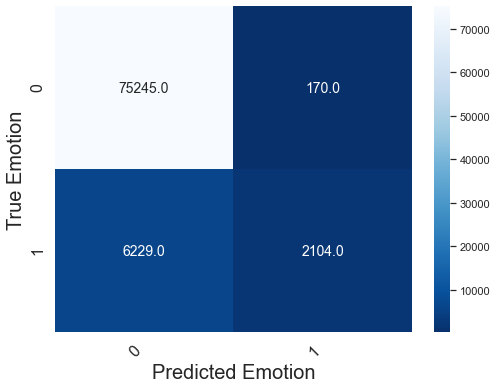

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     81474
           1       0.25      0.93      0.40      2274

    accuracy                           0.92     83748
   macro avg       0.63      0.92      0.68     83748
weighted avg       0.98      0.92      0.94     83748

GBDTresult:

Precision_score: 0.9252418645558487
Recall_score: 0.25249009960398416
f1_score: 0.39671914773262934
AUC: 0.8090014428661745


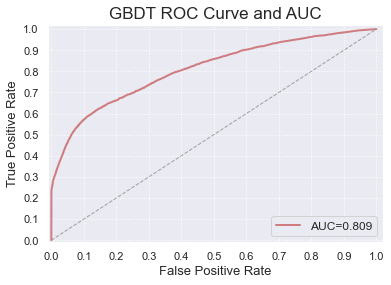

No handles with labels found to put in legend.


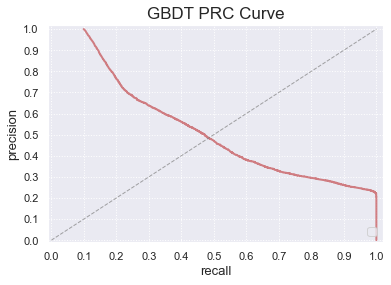

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        75373    42
1         6224  2109


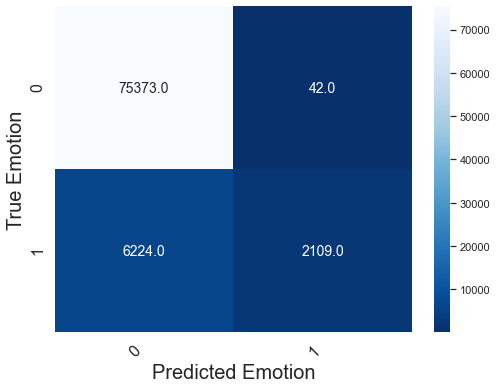

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     81597
           1       0.25      0.98      0.40      2151

    accuracy                           0.93     83748
   macro avg       0.63      0.95      0.68     83748
weighted avg       0.98      0.93      0.95     83748

Random Forestresult:

Precision_score: 0.9804741980474198
Recall_score: 0.2530901236049442
f1_score: 0.40232735597100344
AUC: 0.8289784087551263


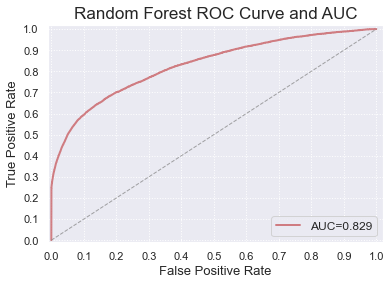

No handles with labels found to put in legend.


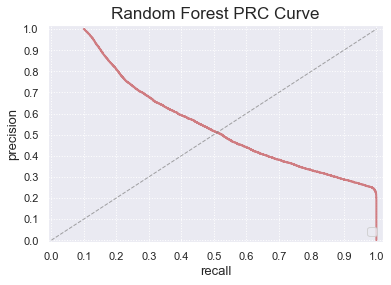

****************************************************************************************************
****************************************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
confusion matrix: 
 predict      0     1
true                
0        75117   298
1         5513  2820


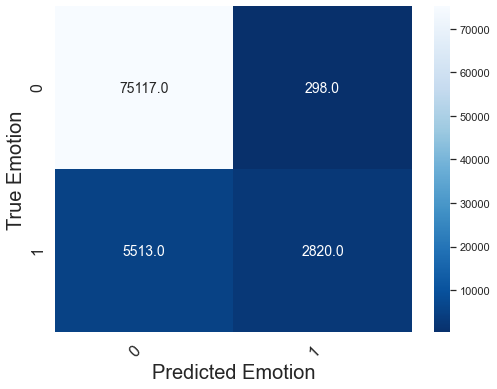

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     80630
           1       0.34      0.90      0.49      3118

    accuracy                           0.93     83748
   macro avg       0.67      0.92      0.73     83748
weighted avg       0.97      0.93      0.95     83748

LightGBMresult:

Precision_score: 0.9044259140474663
Recall_score: 0.33841353654146167
f1_score: 0.4925334031962274
AUC: 0.8693371138677676


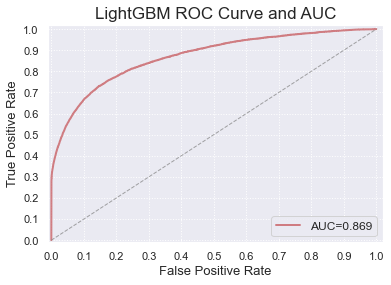

No handles with labels found to put in legend.


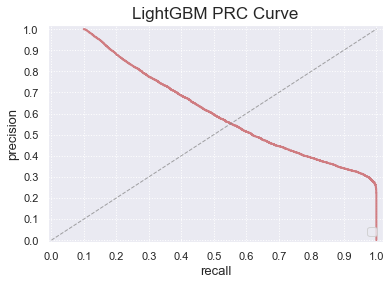

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        75359    56
1         6377  1956


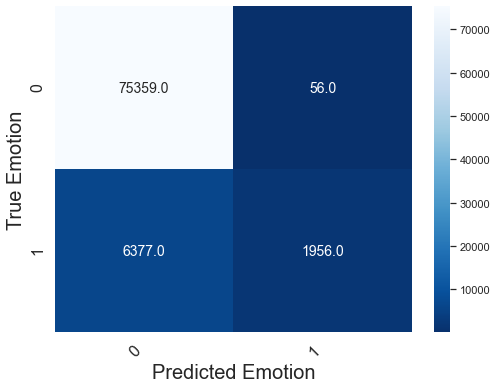

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     81736
           1       0.23      0.97      0.38      2012

    accuracy                           0.92     83748
   macro avg       0.62      0.95      0.67     83748
weighted avg       0.98      0.92      0.95     83748

CatBoostresult:

Precision_score: 0.9721669980119284
Recall_score: 0.23472938917556702
f1_score: 0.378153697438376
AUC: 0.8099474575018273


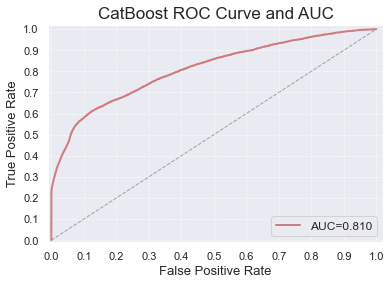

No handles with labels found to put in legend.


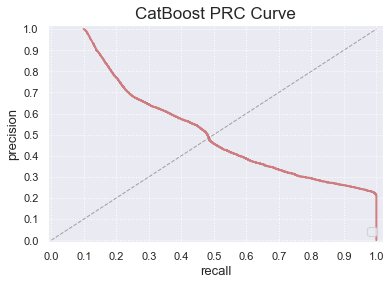

****************************************************************************************************
****************************************************************************************************
[22:55:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix: 
 predict      0     1
true                
0        75059   356
1         5350  2983


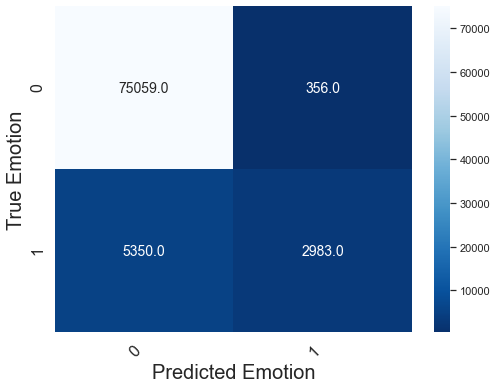

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     80409
           1       0.36      0.89      0.51      3339

    accuracy                           0.93     83748
   macro avg       0.68      0.91      0.74     83748
weighted avg       0.97      0.93      0.95     83748

xgBoostresult:

Precision_score: 0.8933812518718179
Recall_score: 0.3579743189727589
f1_score: 0.5111377655928718
AUC: 0.8796906129377842


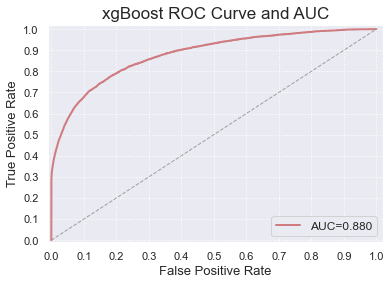

No handles with labels found to put in legend.


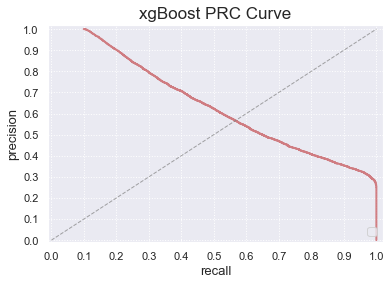

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        74795   620
1         5926  2407


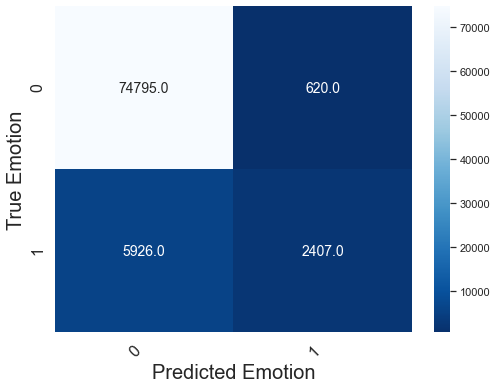

classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     80721
           1       0.29      0.80      0.42      3027

    accuracy                           0.92     83748
   macro avg       0.64      0.86      0.69     83748
weighted avg       0.97      0.92      0.94     83748

AdaBoostresult:

Precision_score: 0.7951767426494879
Recall_score: 0.2888515540621625
f1_score: 0.42376760563380284
AUC: 0.8131337778870831


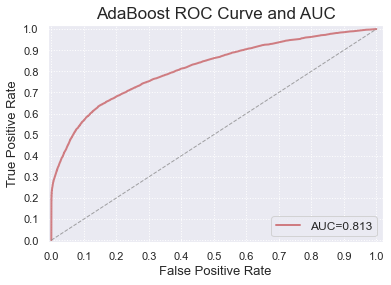

No handles with labels found to put in legend.


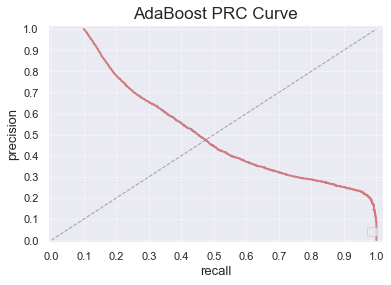

****************************************************************************************************


In [20]:
model = [knn,logr,dt, gbdt, rf,lg,ct,xg,ada]
model2 = ['KNN','Logistic','Decision Tree','GBDT','Random Forest','LightGBM','CatBoost','xgBoost','AdaBoost']
x1 = []
x2 = []
x3 = []
x4 = []
for i,md in enumerate(model):
    print('*'*100)
    md.fit(X_train, y_train)
    y_one_hot = y_test
    y_score = md.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_one_hot,y_score[:,1])
    auc1 = auc(fpr, tpr)
    Y_valid = y_test
    Y_pred = md.predict(X_test)
    precision = precision_score(Y_valid, Y_pred)
    recall = recall_score(Y_valid, Y_pred)
    f1 = f1_score(Y_valid, Y_pred)
    
    predd = pd.DataFrame()
    predd['predict'] = Y_pred
    predd['true'] = list(Y_valid)
    predd['x'] = 0
    gg = predd.groupby(['predict','true'])['x'].count().unstack(0)
    print('confusion matrix: \n', gg)
    f, ax = plt.subplots(figsize=(8,6))
    df_cm = pd.DataFrame(gg)
    sns.heatmap(df_cm,annot=True,fmt ='.1f',cmap = 'Blues_r',annot_kws={'size': 14})
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, rotation=45, horizontalalignment='right',fontsize=16)
    plt.setp(label_y,  fontsize=16)
    plt.xlabel('Predicted Emotion',fontsize=20)
    plt.ylabel('True Emotion',fontsize=20)
    plt.show()
    
    print('classification_report: \n', classification_report(Y_pred, Y_valid,))
    print(model2[i]+'result:\n')
    print("Precision_score:",precision)
    print("Recall_score:",recall)
    print("f1_score:",f1)
    print("AUC:",auc1)
    x1.append(precision)
    x2.append(recall)
    x3.append(auc1)
    x4.append(f1)
    plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc1)
    plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    plt.title(model2[i]+' ROC Curve and AUC', fontsize=17)
    plt.savefig('1：1'+model2[i]+'ROC curve.png')
    plt.show()
    
    
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_one_hot,y_score[:,1])
    lw=1.2
    plt.figure(figsize=(6,4))
    plt.plot(precision, recall, c = 'r', lw = 2, alpha = 0.7)
    plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('recall', fontsize=13)
    plt.ylabel('precision', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    plt.title(model2[i]+' PRC Curve', fontsize=17)
    plt.savefig('1：1'+model2[i]+'PRC curve.png')
    plt.show()
    
    
    
    
    
    
    
    
    
    print('*'*100)
res = pd.DataFrame()
res['classifier'] = model2
res['precision'] = x1
res['recall'] = x2
res['f1_score'] = x4
res['AUC'] = x3

In [21]:
res.to_csv('result.csv',index=False,encoding='utf-8-sig')

In [22]:
res.style.background_gradient('autumn_r')

,classifier,precision,recall,f1_score,AUC
0,KNN,0.478188,0.273611,0.348065,0.733143
1,Logistic,0.359347,0.023761,0.044575,0.637709
2,Decision Tree,0.879546,0.269891,0.413039,0.795012
3,GBDT,0.925242,0.252490,0.396719,0.809001
4,Random Forest,0.980474,0.253090,0.402327,0.828978
5,LightGBM,0.904426,0.338414,0.492533,0.869337
6,CatBoost,0.972167,0.234729,0.378154,0.809947
7,xgBoost,0.893381,0.357974,0.511138,0.879691
8,AdaBoost,0.795177,0.288852,0.423768,0.813134


In [23]:
X_test.shape

(83748, 12)

In [24]:
X_train.shape

(195412, 12)

## Parametric Optimization¶

[22:55:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=2, now auc =0.8345729111270133
[22:55:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=3, now auc =0.8487434483787891
[22:55:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: S

looking for the best max_depth=21, now auc =0.9210513290915513
[23:01:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=22, now auc =0.9183367820027394
[23:02:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=23, now auc =0.9187939364024207
[23:03:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c091

No handles with labels found to put in legend.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


looking for the best max_depth=39, now auc =0.9223329879956453
the best auc is：0.923824386775113, now max_depth=36


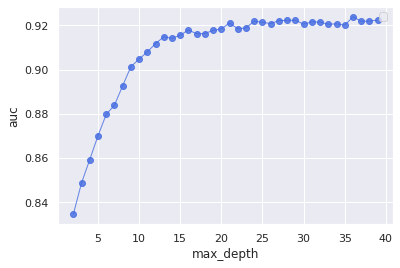

In [25]:
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
aucs = []
n_estimators = []
for n in range(2, 40, 1):
    rfc = xgb.XGBClassifier(max_depth=n)
    rfc.fit(X_train, y_train)
    preprorfc = rfc.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preprorfc)
    n_estimators.append(n)
    aucs.append(auc(fpr, tpr))
    print('looking for the best max_depth={}, now auc ={}'.format(n, auc(fpr, tpr)))
print('the best auc is：{}, now max_depth={}'.format(max(np.array(aucs)), n_estimators[np.argmax(aucs)]))
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

x_axis_data = n_estimators
y_axis_data = aucs

plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)
plt.legend(loc="upper right")
plt.xlabel('max_depth')
plt.ylabel('auc')
plt.show()

## pca

looking for the best n_component=5, now auc =0.7258
looking for the best n_component=6, now auc =0.7346
looking for the best n_component=7, now auc =0.7428
looking for the best n_component=8, now auc =0.751
looking for the best n_component=9, now auc =0.7765
looking for the best n_component=10, now auc =0.7853


No handles with labels found to put in legend.


looking for the best n_component=11, now auc =0.802
the best auc：0.8020156046786013, now n_estimators=11


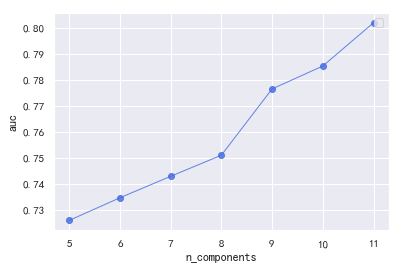

In [28]:
from sklearn.decomposition import PCA
aucs = []
n_components = []
for n_component in range(5, 12):
    pca = PCA(n_components = n_component)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    rfc = xgb.XGBClassifier()
    rfc.fit(X_train_pca, y_train.tolist())
    preprorfc = rfc.predict_proba(X_test_pca)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preprorfc)
    n_components.append(n_component)
    aucs.append(auc(fpr, tpr))
    print('looking for the best n_component={}, now auc ={}'.format(n_component, round(auc(fpr, tpr), 4)))
print('the best auc：{}, now n_estimators={}'.format(max(np.array(aucs)), n_components[np.argmax(aucs)]))
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
x_axis_data = n_components
y_axis_data = aucs

plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)

plt.legend(loc="upper right")
plt.xlabel('n_components')
plt.ylabel('auc')
plt.show()

## k-ford

In [44]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
from sklearn import preprocessing
X_train_sc = preprocessing.scale(X_train)
# for i in X_train_use_sc:
#     print(i)
info = {}
for i in y_train:
    info[i] = info.setdefault(i, 0) + 1
print(info)

{0: 168507, 1: 18715}


In [45]:
ks = []
aucs = []
for index, (train_index, test_index) in enumerate(kf.split(X_train_sc)):
    train_X_k, train_y_k = np.array(X_train_sc)[train_index], np.array(y_train)[train_index]
    test_X_k, test_y_k = np.array(X_train_sc)[test_index], np.array(y_train)[test_index]
    rfc = xgb.XGBClassifier()
    rfc.fit(train_X_k, train_y_k)
    preprorfc = rfc.predict_proba(test_X_k)[:,1]
    fpr, tpr, thresholds = roc_curve(test_y_k, preprorfc)
    print('the{}，auc:{}'.format(index, auc(fpr, tpr)))
    ks.append(index)
    aucs.append(auc(fpr, tpr))

the0，auc:0.877796231392157
the1，auc:0.8689908183995187
the2，auc:0.8771383777339151
the3，auc:0.8681591221578496
the4，auc:0.8735101847973131
the5，auc:0.8773995535714285
the6，auc:0.8797465364512075
the7，auc:0.8741573706875949
the8，auc:0.8741700477661899
the9，auc:0.8768492953713464


No handles with labels found to put in legend.


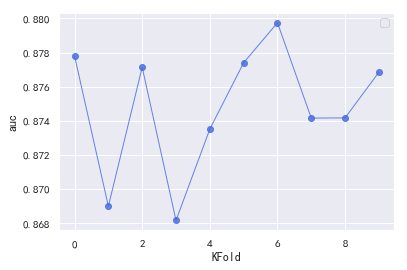

In [48]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
x_axis_data = ks
y_axis_data = aucs
plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)
plt.legend(loc="upper right")
plt.xlabel('KFold')
plt.ylabel('auc')
plt.show()